Table of context:
- [SP500](#sp500)
- [China](#china)
- [USA](#usa)
- [Japan](#japan)
- [Switzerland](#swiss)


In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import operator
import statsmodels
import statsmodels.tsa.seasonal
import warnings

from importlib import reload 
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
import stock_analysis_functions
reload(stock_analysis_functions)
from stock_analysis_functions import data_from_yahoo, fill_nan, extract_max, plot_price, plot_price_rolling
from stock_analysis_functions import returns, get_sp500_stocks_data, create_SP500_index, create_merge_SP500_index
from stock_analysis_functions import plot_variance, plot_rolling_timeseries, plot_sp500_comparison, plot_sp500_comparison_rolling

In [3]:
# import tickers
import tickers
reload(tickers)
from tickers import japan_tickers, china_tickers, us_tickers, ticker_id, swiss_tickers

In [4]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 12, 1)

In [5]:
country_names = ['China', 'USA', 'Japan', 'Switzerland']

In [6]:
#datasets_swiss = data_from_yahoo(swiss_tickers, ticker_id, start, end, 'swiss')

In [7]:
# take the stock data from yahoo for the countries

# the first time we run the script read is False, because we have to extract and save the data.
# this work is particularly time consuming (especially with my computer), so we run it only once on
# Colab and then we only read the data.

datasets_chn = data_from_yahoo(china_tickers, ticker_id, start, end, 'china', read=True)
datasets_us = data_from_yahoo(us_tickers, ticker_id, start, end, 'usa', read=True)
datasets_jpn = data_from_yahoo(japan_tickers, ticker_id, start, end, 'japan', read=True)
datasets_swiss = data_from_yahoo(swiss_tickers, ticker_id, start, end, 'swiss', read=True)

In [8]:
adj_close = {'China':datasets_chn['adj_close'], 'USA':datasets_us['adj_close'], 'Japan':datasets_jpn['adj_close'], 'Switzerland':datasets_swiss['adj_close']}
openn = {'China':datasets_chn['open'], 'USA':datasets_us['open'], 'Japan':datasets_jpn['open'], 'Switzerland':datasets_swiss['open']}
close = {'China':datasets_chn['close'], 'USA':datasets_us['close'], 'Japan':datasets_jpn['close'], 'Switzerland':datasets_swiss['close']}
high = {'China':datasets_chn['high'], 'USA':datasets_us['high'], 'Japan':datasets_jpn['high'], 'Switzerland':datasets_swiss['high']}
low = {'China':datasets_chn['low'], 'USA':datasets_us['low'], 'Japan':datasets_jpn['low'], 'Switzerland':datasets_swiss['low']}


In [9]:
index = adj_close['China']['Date'] # take the index from a random datasets (same index for all)

In [10]:
# filNaN
adj_close= fill_nan (adj_close, index, 'adj_close')
openn= fill_nan (openn, index, 'openn')
close= fill_nan (close, index, 'close')


adj_close
 
China: 

Totally, in the dataset there are 492 NaNs values
After the filling thought the mean, in the dataset there are 0 NaNs values
 
USA: 

Totally, in the dataset there are 0 NaNs values
 
Japan: 

Totally, in the dataset there are 31 NaNs values
After the filling thought the mean, in the dataset there are 2 NaNs values
After the filling of first/last values, in the dataset there are 0 NaNs values
 
Switzerland: 

Totally, in the dataset there are 177 NaNs values
After the filling thought the mean, in the dataset there are 58 NaNs values
After the filling of first/last values, in the dataset there are 0 NaNs values

openn
 
China: 

Totally, in the dataset there are 492 NaNs values
After the filling thought the mean, in the dataset there are 0 NaNs values
 
USA: 

Totally, in the dataset there are 0 NaNs values
 
Japan: 

Totally, in the dataset there are 31 NaNs values
After the filling thought the mean, in the dataset there are 2 NaNs values
After the filling of firs

# SP500 <a class="anchor" id="sp500"></a>

In [11]:
#df_sp500_stocks = get_sp500_stocks_data(index, start, end)

In [12]:
df_sp500_stocks = get_sp500_stocks_data(index, start, end, read=True)

In [13]:
df_sp500_stocks.head()

Adj Close         Adj Close.1         Adj Close.2  \
0                  A                 AAL                 AAP   
1                NaN                 NaN                 NaN   
2  84.62352752685547  28.574403762817383  158.65269470214844   
3  85.25837707519531  28.982892990112305  157.90972900390625   
4  83.88947296142578  27.548194885253906   157.9196319580078   

         Adj Close.3        Adj Close.4        Adj Close.5  \
0               AAPL               ABBV                ABC   
1                NaN                NaN                NaN   
2    72.783935546875  83.89559936523438  83.53189849853516   
3   74.4446029663086  84.85260772705078  83.59085845947266   
4  73.72084045410156  84.04720306396484  82.53959655761719   

          Adj Close.6        Adj Close.7        Adj Close.8  \
0                ABMD                ABT                ACN   
1                 NaN                NaN                NaN   
2  170.58999633789062  85.51184844970703  207.2430877685547   
3  168.80999755859375  85.60044860839844  206.8297119140625   
4  166.82000732421875   84.5569076538086  206.4852294921875   

          Adj Close.9  ... Volume.496 Volume.497 Volume.498 Volume.499  \
0                ADBE  ...        XOM       XRAY        XRX        XYL   
1                 NaN  ...        NaN        NaN        NaN        NaN   
2  329.80999755859375  ...   13151800    1211000    1380100     492000   
3  334.42999267578125  ...   12456400    1556600    1581300     869500   
4  331.80999755859375  ...   17386900     910000    1042600     795100   

  Volume.500 Volume.501 Volume.502 Volume.503 Volume.504 Date  
0        YUM        ZBH       ZBRA       ZION        ZTS  NaN  
1        NaN        NaN        NaN        NaN        NaN  NaN  
2    1271000     612400     363500    1246900    1128600  NaN  
3    1369900    1052400     387800    1528700    1576700  NaN  
4    1145500     963500     305300    1215800    1274000  NaN  

[5 rows x 3031 columns]

In [14]:
# only Adj Close prices, no volume
columns_adj_prices = [col for col in df_sp500_stocks if col.startswith('Adj Close')]
df_sp500_stocks = df_sp500_stocks[columns_adj_prices]

In [15]:
# correct columns names:
df_sp500_stocks = df_sp500_stocks.rename(columns=df_sp500_stocks.iloc[0]) # rename columns first line
df_sp500_stocks = df_sp500_stocks.drop(df_sp500_stocks.index[0]) # dlete first line
df_sp500_stocks = df_sp500_stocks.drop(df_sp500_stocks.index[0]) # delete data row'''
df_sp500_stocks['Date'] = index # we check this was fine !
df_sp500_stocks = df_sp500_stocks[df_sp500_stocks['Date'].isnull()==False]
df_sp500_stocks = df_sp500_stocks.set_index('Date')
#df_sp500_stocks = df_sp500_stocks.drop('Date', axis=1)

df_sp500_stocks.head()

A                 AAL                 AAP  \
Date                                                                    
2020-01-06  84.62352752685547  28.574403762817383  158.65269470214844   
2020-01-07  85.25837707519531  28.982892990112305  157.90972900390625   
2020-01-08  83.88947296142578  27.548194885253906   157.9196319580078   
2020-01-09  84.13746643066406  27.219409942626953  155.32431030273438   
2020-01-10  84.39537811279297   27.11977767944336  153.48182678222656   

                         AAPL               ABBV                ABC  \
Date                                                                  
2020-01-06    72.783935546875  83.89559936523438  83.53189849853516   
2020-01-07   74.4446029663086  84.85260772705078  83.59085845947266   
2020-01-08  73.72084045410156  84.04720306396484  82.53959655761719   
2020-01-09  74.30826568603516  84.71047973632812  83.74805450439453   
2020-01-10  73.95879364013672  84.22723388671875  83.14872741699219   

                          ABMD                ABT                 ACN  \
Date                                                                    
2020-01-06  170.58999633789062  85.51184844970703   207.2430877685547   
2020-01-07  168.80999755859375  85.60044860839844   206.8297119140625   
2020-01-08  166.82000732421875   84.5569076538086   206.4852294921875   
2020-01-09   179.0399932861328  84.99991607666016  205.13690185546875   
2020-01-10  180.35000610351562   84.5273666381836   200.7079620361328   

                          ADBE  ...                XLNX                XOM  \
Date                            ...                                          
2020-01-06  329.80999755859375  ...   96.29391479492188  64.61932373046875   
2020-01-07  334.42999267578125  ...  100.11534881591797    65.656494140625   
2020-01-08  331.80999755859375  ...   97.81067657470703  65.12865447998047   
2020-01-09   333.7099914550781  ...   95.77192687988281  65.62871551513672   
2020-01-10   333.3900146484375  ...   97.95840454101562  65.09160614013672   

                          XRAY                 XRX                XYL  \
Date                                                                    
2020-01-06   56.05650329589844  34.930084228515625  77.76145935058594   
2020-01-07    56.3932991027832   34.98693084716797  78.80762481689453   
2020-01-08   55.76923751831055   34.53218460083008       79.271484375   
2020-01-09  56.076316833496094   34.01112747192383  78.75828552246094   
2020-01-10   56.37348937988281   34.05849075317383  78.46219635009766   

                           YUM                 ZBH                ZBRA  \
Date                                                                     
2020-01-06    98.8283462524414   148.4962615966797  255.44000244140625   
2020-01-07  100.24114990234375   148.0200653076172   259.1400146484375   
2020-01-08   99.92719268798828  147.63314819335938  256.04998779296875   
2020-01-09   99.86833190917969   146.7799530029297    258.010009765625   
2020-01-10  100.04493713378906  146.65097045898438   256.4700012207031   

                          ZION                 ZTS  
Date                                                
2020-01-06   50.02912139892578  131.59608459472656  
2020-01-07  50.530181884765625   133.3759002685547  
2020-01-08  49.817134857177734  133.39578247070312  
2020-01-09  49.210079193115234   132.3716583251953  
2020-01-10   48.91136932373047  132.81907653808594  

[5 rows x 505 columns]

In [16]:
# values from string to float
for c in df_sp500_stocks.columns:
    try:
        df_sp500_stocks[c] = pd.to_numeric(df_sp500_stocks[c])
    except:
        pass
    
print(df_sp500_stocks.info())

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 2020-01-06 to 2020-12-01
Columns: 505 entries, A to ZTS
dtypes: float64(505)
memory usage: 909.2+ KB
None


In [17]:
dict_sp500 = {'SP500': df_sp500_stocks} # trasform to dict to use the same fucntion we defined for the stocks
dict_sp500 = fill_nan(dict_sp500, index, 'SP500', False)
df_sp500_stocks = dict_sp500['SP500']


SP500
 
SP500: 

Totally, in the dataset there are 409 NaNs values
After the filling thought the mean, in the dataset there are 358 NaNs values
After the filling of first/last values, in the dataset there are 0 NaNs values


In [18]:
df_sp500_stocks.head()

A        AAL         AAP       AAPL       ABBV        ABC  \
Date                                                                            
2020-01-06  84.623528  28.574404  158.652695  72.783936  83.895599  83.531898   
2020-01-07  85.258377  28.982893  157.909729  74.444603  84.852608  83.590858   
2020-01-08  83.889473  27.548195  157.919632  73.720840  84.047203  82.539597   
2020-01-09  84.137466  27.219410  155.324310  74.308266  84.710480  83.748055   
2020-01-10  84.395378  27.119778  153.481827  73.958794  84.227234  83.148727   

                  ABMD        ABT         ACN        ADBE  ...        XLNX  \
Date                                                       ...               
2020-01-06  170.589996  85.511848  207.243088  329.809998  ...   96.293915   
2020-01-07  168.809998  85.600449  206.829712  334.429993  ...  100.115349   
2020-01-08  166.820007  84.556908  206.485229  331.809998  ...   97.810677   
2020-01-09  179.039993  84.999916  205.136902  333.709991  ...   95.771927   
2020-01-10  180.350006  84.527367  200.707962  333.390015  ...   97.958405   

                  XOM       XRAY        XRX        XYL         YUM  \
Date                                                                 
2020-01-06  64.619324  56.056503  34.930084  77.761459   98.828346   
2020-01-07  65.656494  56.393299  34.986931  78.807625  100.241150   
2020-01-08  65.128654  55.769238  34.532185  79.271484   99.927193   
2020-01-09  65.628716  56.076317  34.011127  78.758286   99.868332   
2020-01-10  65.091606  56.373489  34.058491  78.462196  100.044937   

                   ZBH        ZBRA       ZION         ZTS  
Date                                                       
2020-01-06  148.496262  255.440002  50.029121  131.596085  
2020-01-07  148.020065  259.140015  50.530182  133.375900  
2020-01-08  147.633148  256.049988  49.817135  133.395782  
2020-01-09  146.779953  258.010010  49.210079  132.371658  
2020-01-10  146.650970  256.470001  48.911369  132.819077  

[5 rows x 505 columns]

# China  <a class="anchor" id="china"></a>

In [19]:
country = 'China'

In [20]:
index = adj_close[country]['Date'] 

### Correlation Matrix adj prices

In [21]:
print(f"Corr Matrix Adj Prices first 50 companies China")
corr = adj_close[country].corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 50 companies China


In [22]:
# name first 5
name_important_stocks_china = extract_max(adj_close[country], 5, Names=True)

# dataset first 5
adj_close_imp_china = adj_close[country][name_important_stocks_china]
adj_close_imp_china['Data'] = index
adj_close_imp_china = adj_close_imp_china.set_index('Data')
adj_close_imp_china.head()

MOUTAI     MINDRAY        BABA      CTGDF      FOSHAN
Data                                                                  
2020-01-02  1116.952637  179.320694  219.770004  89.709709  106.899536
2020-01-03  1066.106689  177.003738  217.000000  90.636192  104.335930
2020-01-06  1065.543213  175.631454  216.639999  89.659897  102.564171
2020-01-07  1081.892212  179.688614  217.630005  90.566460  104.919914
2020-01-08  1075.576050  179.141693  218.000000  90.954987  105.088181

In [23]:
# first 5 companies
print(f"Corr Matrix Adj Prices first 5 companies China")
corr = adj_close_imp_china.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 5 companies China


### Plot time series adjusted closing price

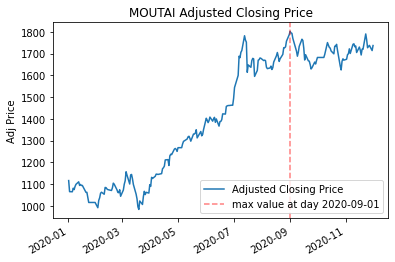

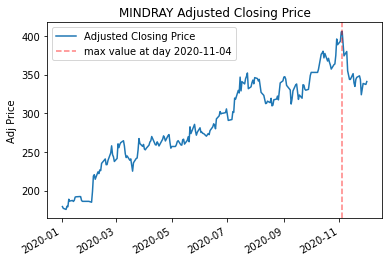

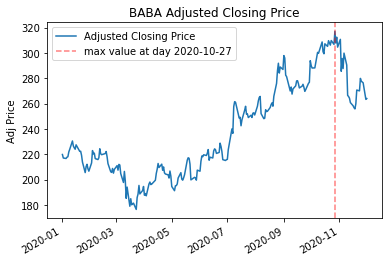

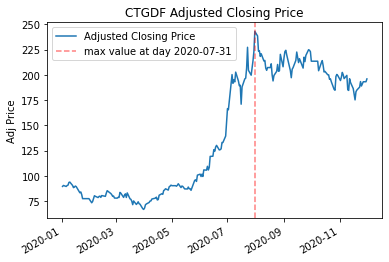

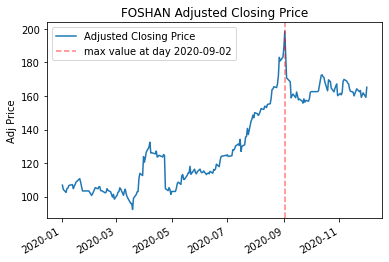

In [24]:
plot_price(index, adj_close_imp_china, name_important_stocks_china, country, 'Adjusted Closing Price', 'Adj Price')

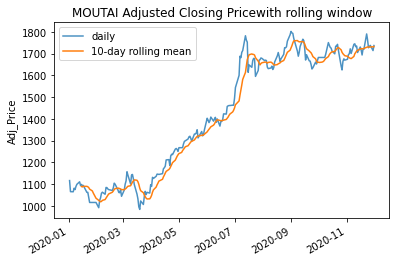

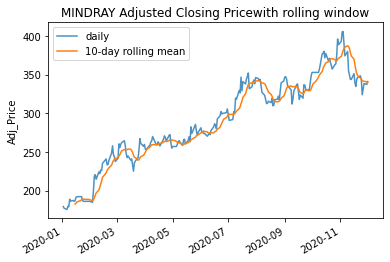

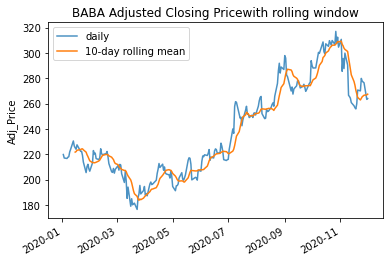

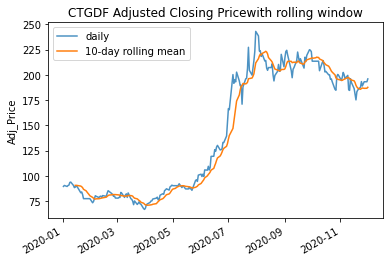

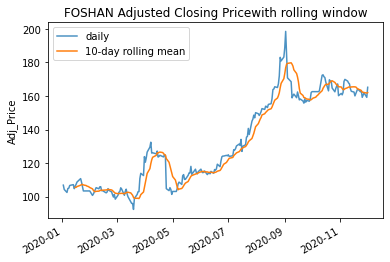

In [25]:
# plot with rolling of 10 days
plot_price_rolling(index, adj_close_imp_china, 10, name_important_stocks_china, country, 'Adjusted Closing Price', 'Adj_Price')

### Variance adjusted prices

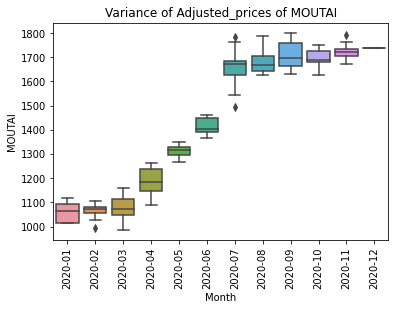

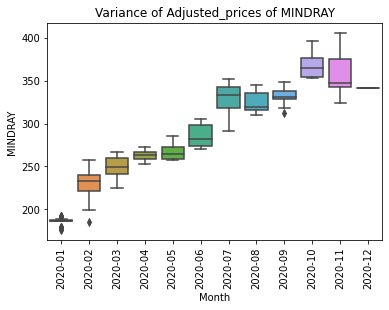

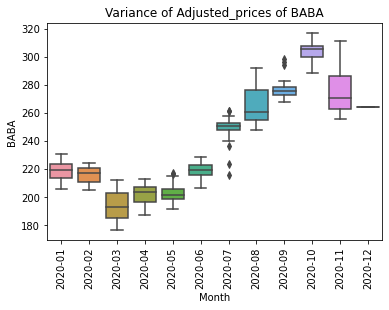

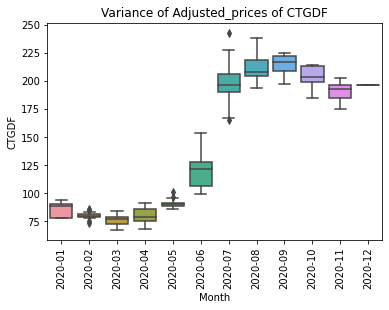

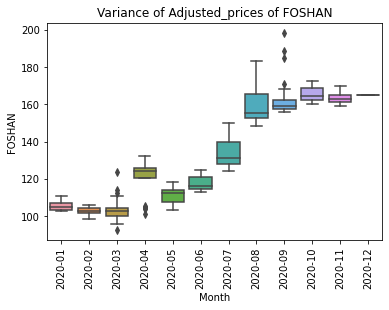

In [26]:
plot_variance(name_important_stocks_china, adj_close_imp_china, country, 'Adjusted_prices')

### Return:

$R_t = \frac{S_t-S_{t-1}}{S_{t-1}}$

In [27]:
# return only top stocks
df_returns = returns(name_important_stocks_china, adj_close_imp_china, index, country)
df_returns.head()

MOUTAI   MINDRAY      BABA     CTGDF    FOSHAN
Date                                                        
2020-01-02       NaN       NaN       NaN       NaN       NaN
2020-01-03 -4.552203 -1.292074 -1.260411  1.032757 -2.398145
2020-01-06 -0.052854 -0.775285 -0.165899 -1.077159 -1.698129
2020-01-07  1.534335  2.310041  0.456982  1.011113  2.296848
2020-01-08 -0.583807 -0.304371  0.170011  0.428996  0.160376

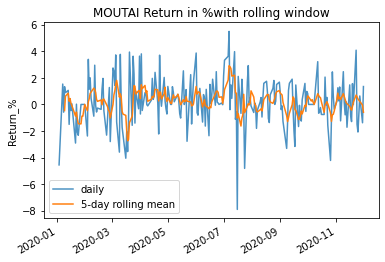

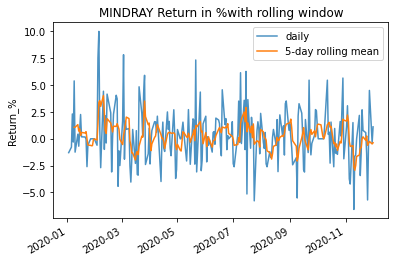

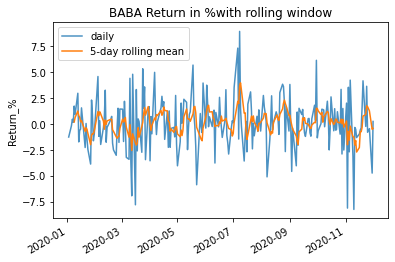

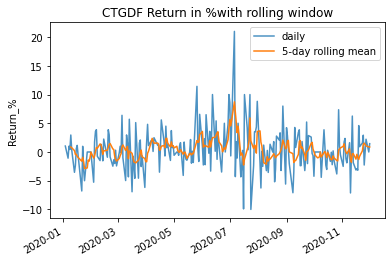

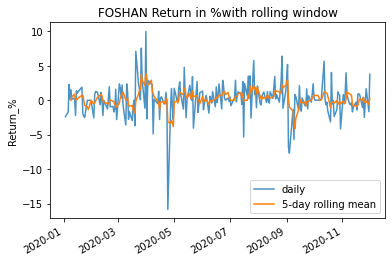

In [28]:
plot_price_rolling(index, df_returns, 5, name_important_stocks_china, country, 'Return in %', 'Return_%')

### Variance Returns

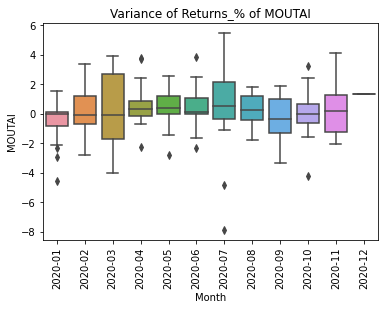

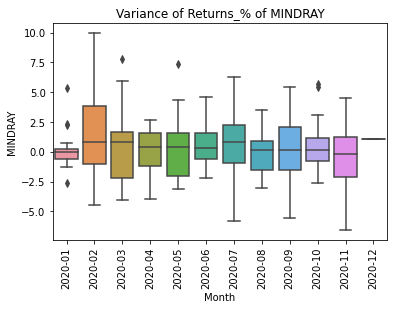

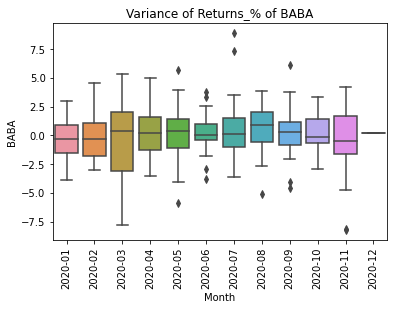

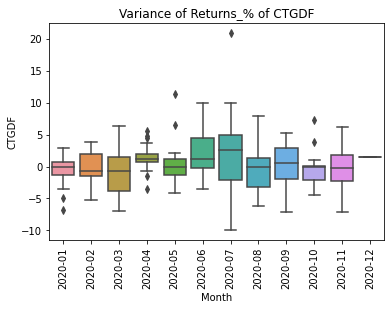

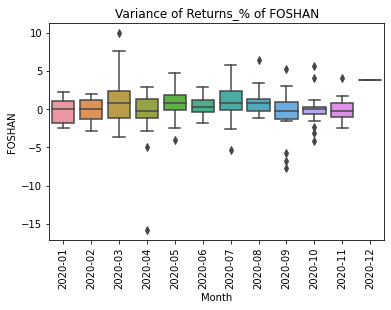

In [29]:
plot_variance(name_important_stocks_china, df_returns, country, 'Returns_%')

### Plot difference difference open closing

In order to understand how much they loose each day

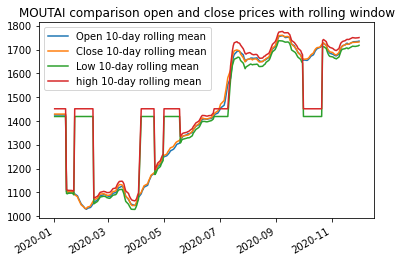

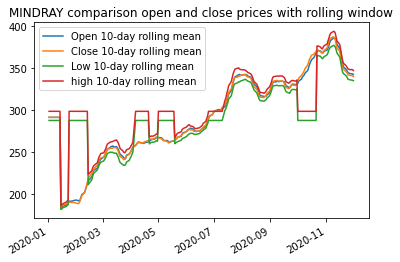

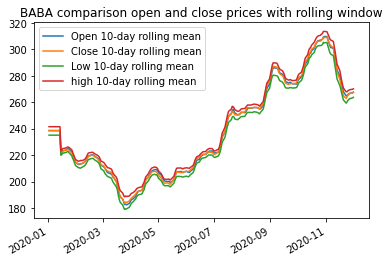

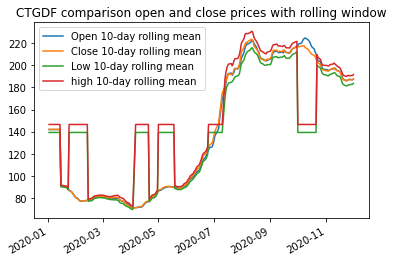

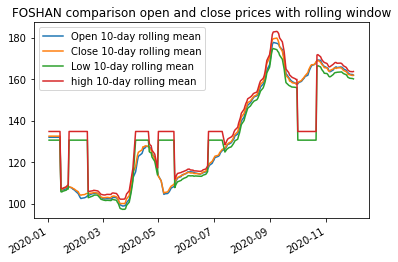

In [30]:
df = {'open': openn[country], 'close': close[country], 'high': high[country], 'low': low[country]}

plot_rolling_timeseries(index, name_important_stocks_china, df, 10, country, 'comparison open and close prices')

### Comparison SP500

In [31]:
#  create the SP500 dataframe and merge it to tnhe returns dataframe
df_returns_sp500 = create_merge_SP500_index(df_sp500_stocks, df_returns)
df_returns_sp500.head()

MOUTAI   MINDRAY      BABA     CTGDF    FOSHAN     SP500
Date                                                                  
2020-01-07  1.534335  2.310041  0.456982  1.011113  2.296848  0.549624
2020-01-08 -0.583807 -0.304371  0.170011  0.428996  0.160376 -0.370652
2020-01-09  1.338048  5.389954  1.733944  2.957283  1.525862  0.251415
2020-01-10  0.888743 -1.243019  0.924341  0.361693  0.157713 -0.071727
2020-01-13  1.057971  0.426672  2.971002 -3.540377  0.314929  0.347526

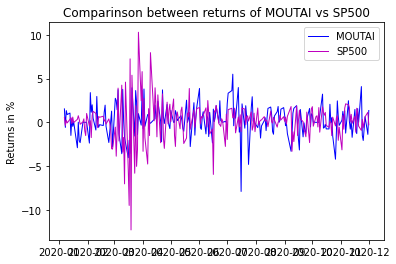

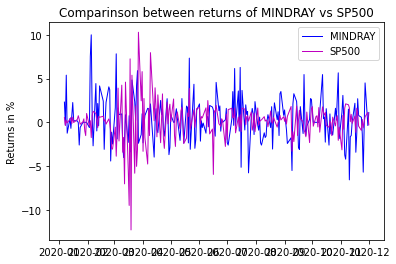

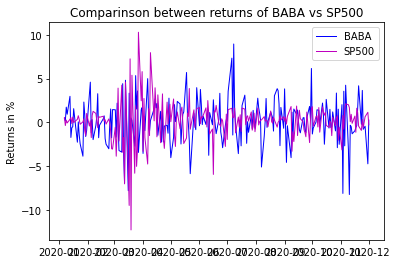

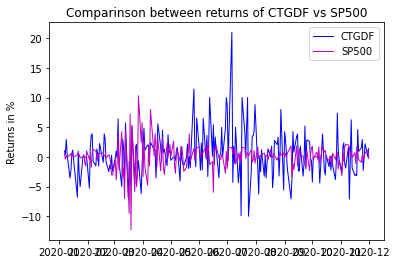

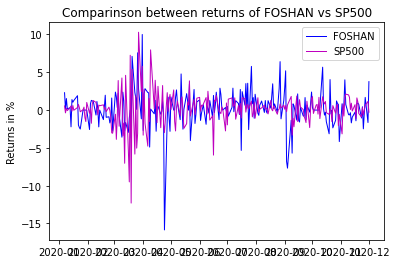

In [32]:
plot_sp500_comparison (df_returns_sp500, name_important_stocks_china, country, 'returns')

In this way it is really hard to enderstand (no good plot). Therefore, let us work with rolling windows, which lend to much more readable results

**Comparison with Rolling Windows:**

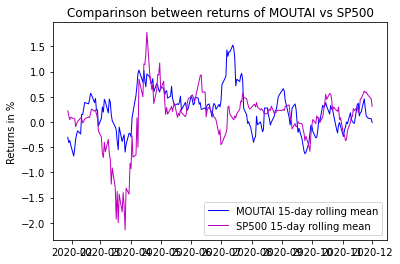

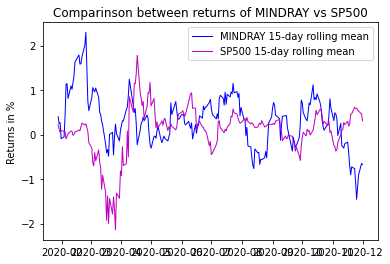

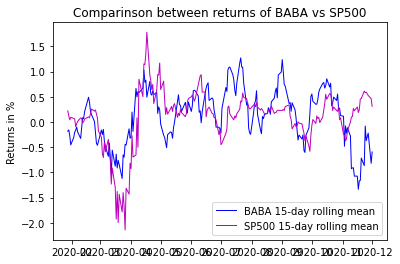

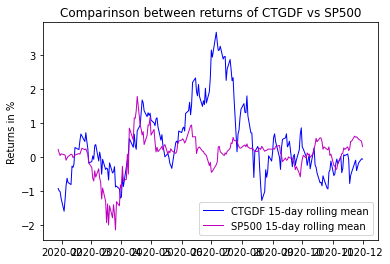

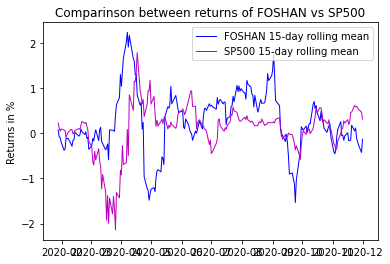

In [33]:
plot_sp500_comparison_rolling (df_returns_sp500, name_important_stocks_china, 15, country, 'returns')

# USA  <a class="anchor" id="usa"></a>

In [34]:
country = 'USA'

In [35]:
index = adj_close[country]['Date'] 

### Correlation Matrix adj prices

In [36]:
print(f"Corr Matrix Adj Prices first 50 companies China")
corr = adj_close[country].corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 50 companies China


In [37]:
# name first 5
name_important_stocks_china = extract_max(adj_close[country], 5, Names=True)

# dataset first 5
adj_close_imp_china = adj_close[country][name_important_stocks_china]
adj_close_imp_china['Data'] = index
adj_close_imp_china = adj_close_imp_china.set_index('Data')
adj_close_imp_china.head()

BRK-A         AMZN         GOOG        GOOGL        NFLX
Data                                                                 
2020-01-02  342261  1898.010010  1367.369995  1368.680054  329.809998
2020-01-03  339155  1874.969971  1360.660034  1361.520020  325.899994
2020-01-06  340210  1902.880005  1394.209961  1397.810059  335.829987
2020-01-07  338901  1906.859985  1393.339966  1395.109985  330.750000
2020-01-08  339188  1891.969971  1404.319946  1405.040039  339.260010

In [38]:
# first 5 companies
print(f"Corr Matrix Adj Prices first 5 companies China")
corr = adj_close_imp_china.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 5 companies China


### Plot time series adjusted closing price

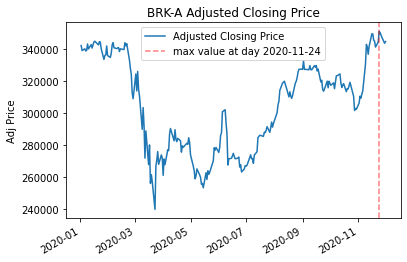

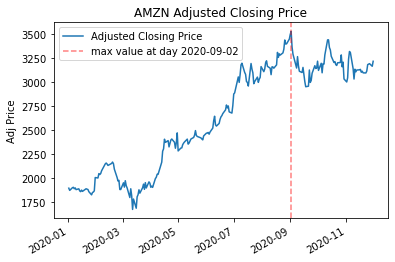

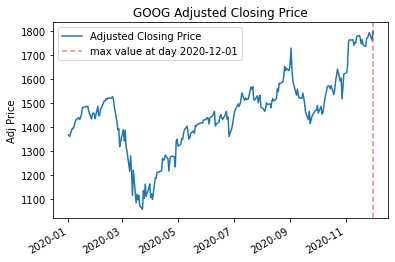

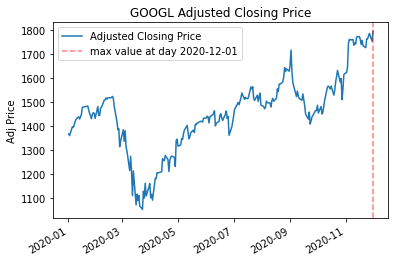

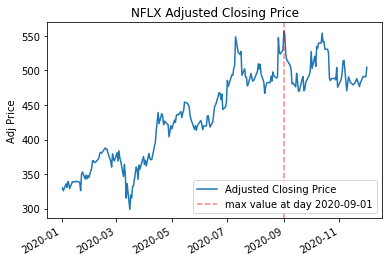

In [39]:
plot_price(index, adj_close_imp_china, name_important_stocks_china, country, 'Adjusted Closing Price', 'Adj Price')

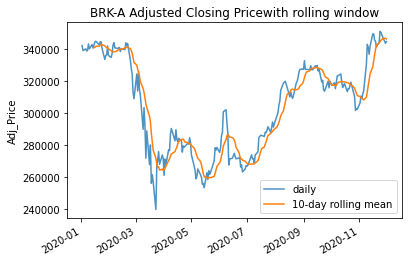

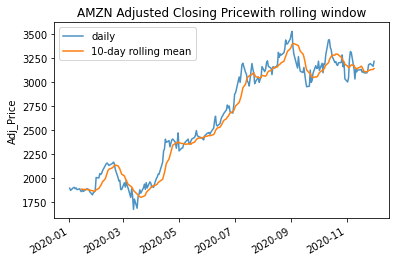

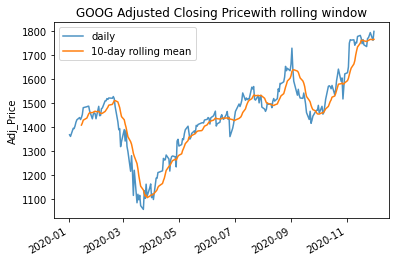

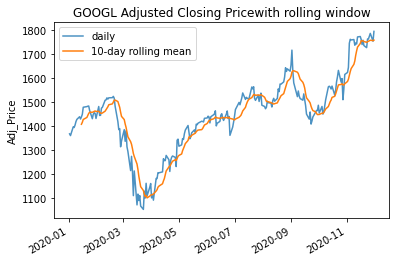

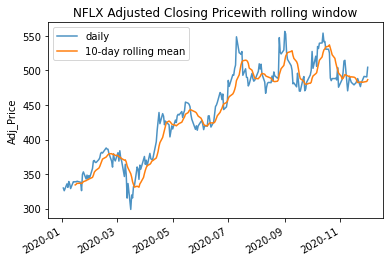

In [40]:
# plot with rolling of 10 days
plot_price_rolling(index, adj_close_imp_china, 10, name_important_stocks_china, country, 'Adjusted Closing Price', 'Adj_Price')

### Variance adjusted prices

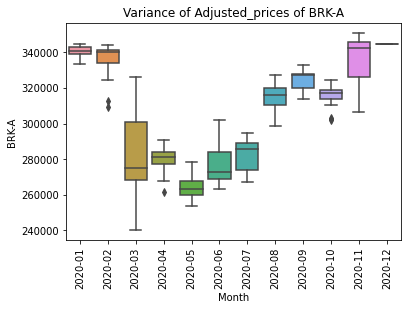

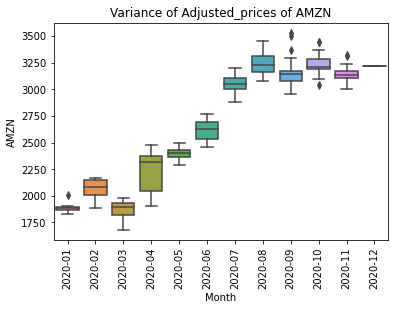

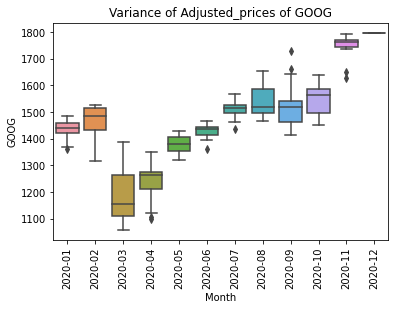

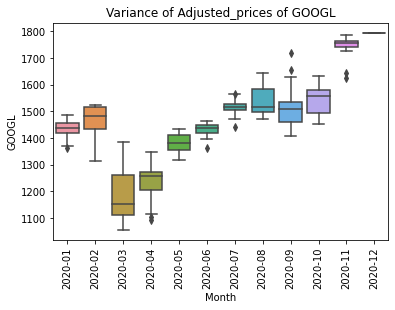

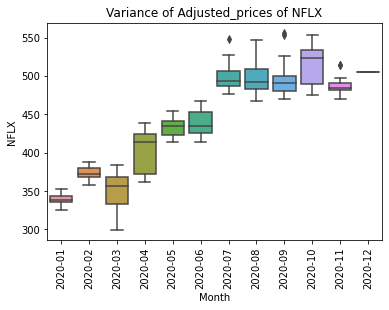

In [41]:
plot_variance(name_important_stocks_china, adj_close_imp_china, country, 'Adjusted_prices')

### Return:

$R_t = \frac{S_t-S_{t-1}}{S_{t-1}}$

In [42]:
df_returns = returns(name_important_stocks_china, adj_close_imp_china, index, country)
df_returns.head()

BRK-A      AMZN      GOOG     GOOGL      NFLX
Date                                                        
2020-01-02       NaN       NaN       NaN       NaN       NaN
2020-01-03 -0.907495 -1.213905 -0.490720 -0.523134 -1.185532
2020-01-06  0.311067  1.488559  2.465710  2.665406  3.046945
2020-01-07 -0.384762  0.209156 -0.062401 -0.193165 -1.512666
2020-01-08  0.084685 -0.780866  0.788033  0.711776  2.572943

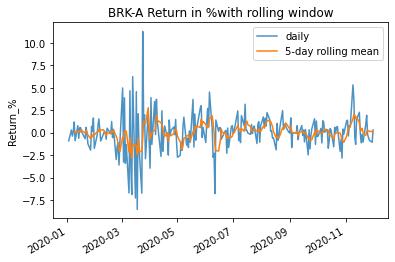

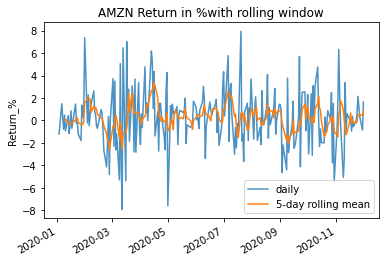

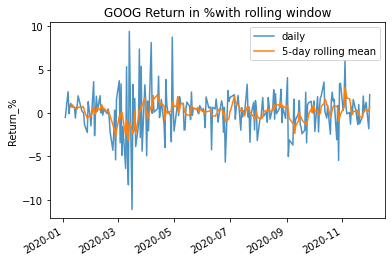

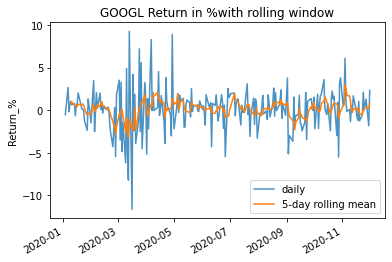

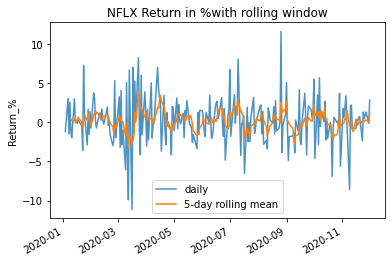

In [43]:
plot_price_rolling(index, df_returns, 5, name_important_stocks_china, country, 'Return in %', 'Return_%')

### Variance Returns

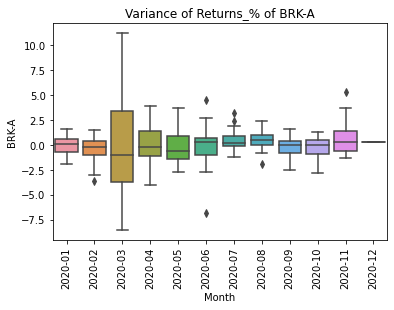

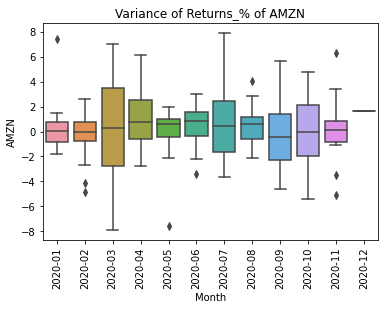

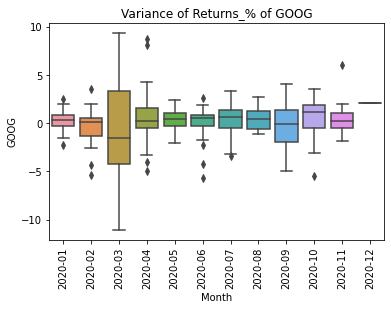

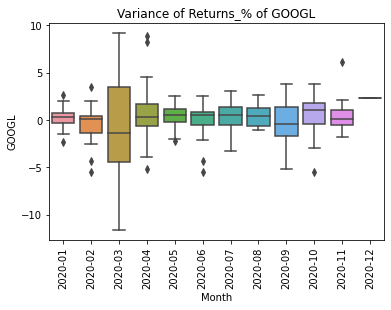

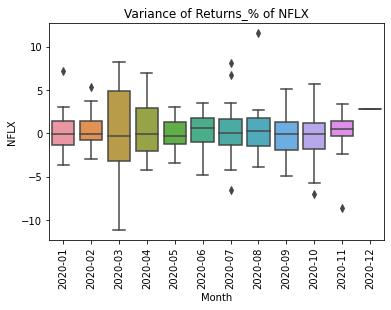

In [44]:
plot_variance(name_important_stocks_china, df_returns, country, 'Returns_%')

### Plot difference difference open closing

In order to understand how much they loose each day

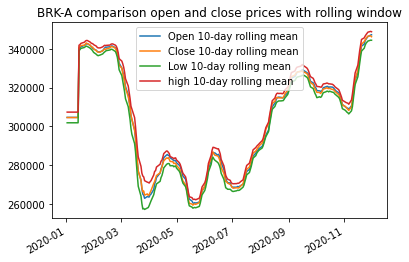

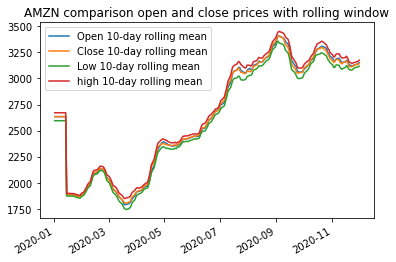

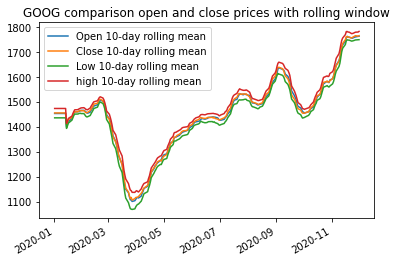

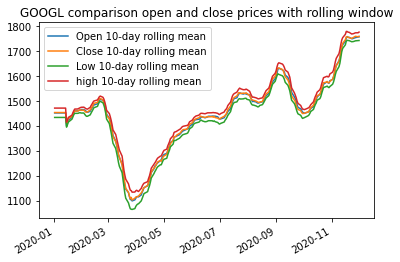

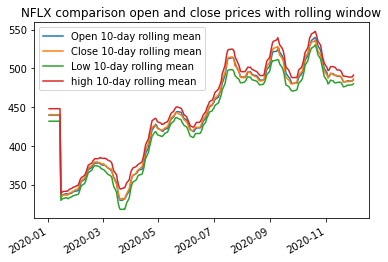

In [45]:
df = {'open': openn[country], 'close': close[country], 'high': high[country], 'low': low[country]}

plot_rolling_timeseries(index, name_important_stocks_china, df, 10, country, 'comparison open and close prices')

### Comparison SP500

In [46]:
#  create the SP500 dataframe and merge it to tnhe returns dataframe
df_returns_sp500 = create_merge_SP500_index(df_sp500_stocks, df_returns)
df_returns_sp500.head()

BRK-A      AMZN      GOOG     GOOGL      NFLX     SP500
Date                                                                  
2020-01-07 -0.384762  0.209156 -0.062401 -0.193165 -1.512666  0.549624
2020-01-08  0.084685 -0.780866  0.788033  0.711776  2.572943 -0.370652
2020-01-09  1.201399  0.479927  1.104450  1.049792 -1.061135  0.251415
2020-01-10 -0.896689 -0.941060  0.697268  0.645865 -1.969259 -0.071727
2020-01-13  0.784867  0.432253  0.664461  0.774694  2.999552  0.347526

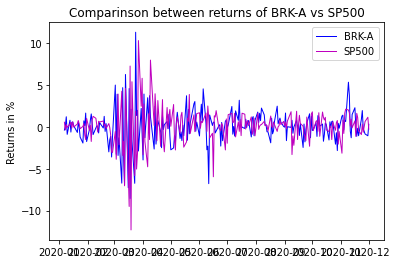

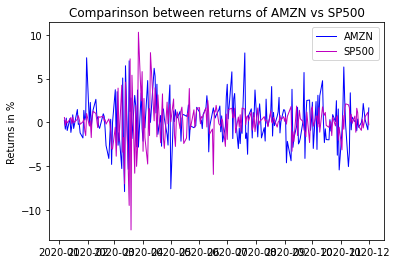

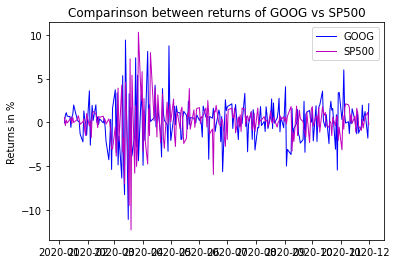

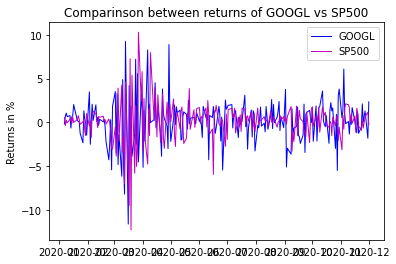

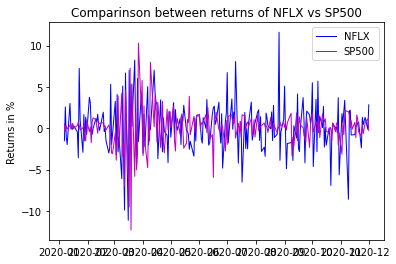

In [47]:
plot_sp500_comparison (df_returns_sp500, name_important_stocks_china, country, 'returns')

In this way it is really hard to enderstand (no good plot). Therefore, let us work with rolling windows, which lend to much more readable results

**Comparison with Rolling Windows:**

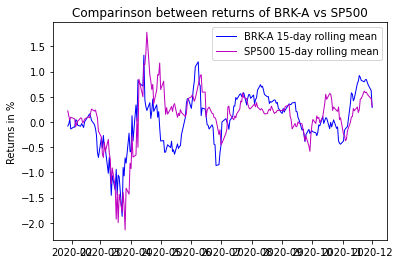

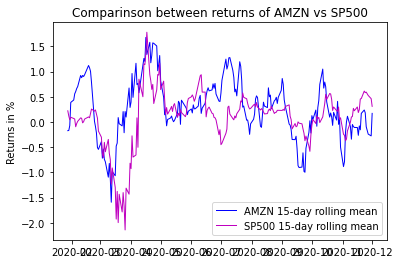

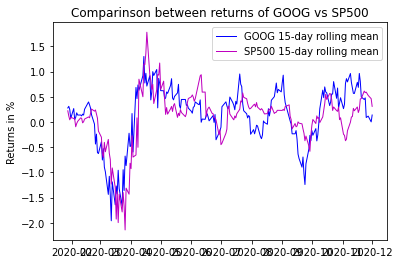

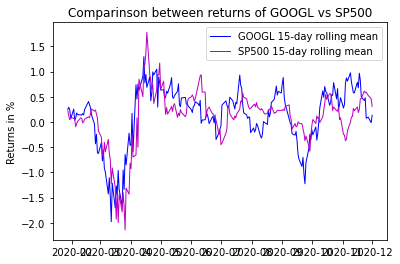

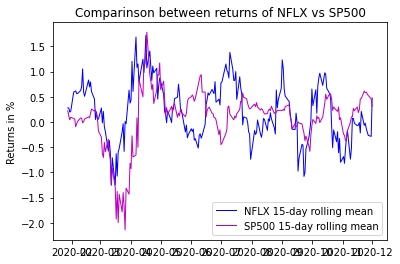

In [48]:
plot_sp500_comparison_rolling (df_returns_sp500, name_important_stocks_china, 15, country, 'returns')

# Japan  <a class="anchor" id="japan"></a>

In [49]:
country = 'Japan'

In [50]:
index = adj_close[country]['Date'] 

### Correlation Matrix adj prices

In [52]:
print(f"Corr Matrix Adj Prices first 50 companies China")
corr = adj_close[country].corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 50 companies China


In [53]:
# name first 5
name_important_stocks_china = extract_max(adj_close[country], 5, Names=True)

# dataset first 5
adj_close_imp_china = adj_close[country][name_important_stocks_china]
adj_close_imp_china['Data'] = index
adj_close_imp_china = adj_close_imp_china.set_index('Data')
adj_close_imp_china.head()

MITSUB       MITSY       SZKMY          TM        SNE
Data                                                                  
2020-01-02  2733.517578  347.638550  165.833923  139.752579  68.800194
2020-01-03  2733.517578  344.871155  164.968719  138.288635  67.823883
2020-01-06  2733.517578  350.951599  163.390701  138.308289  68.850006
2020-01-07  2766.217285  351.565491  164.192001  139.035339  69.935905
2020-01-08  2723.091553  353.806671  162.717224  138.691467  70.194931

In [54]:
# first 5 companies
print(f"Corr Matrix Adj Prices first 5 companies China")
corr = adj_close_imp_china.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 5 companies China


### Plot time series adjusted closing price

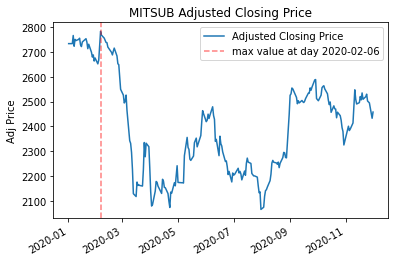

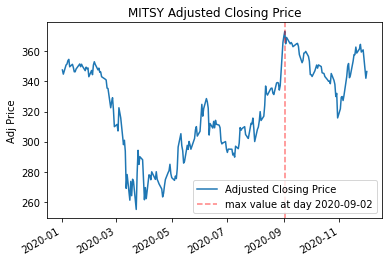

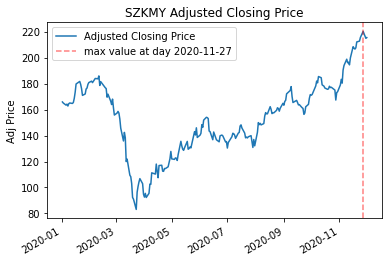

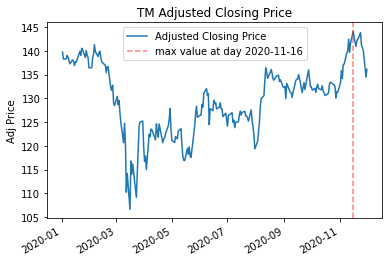

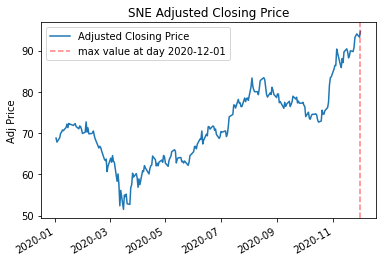

In [55]:
plot_price(index, adj_close_imp_china, name_important_stocks_china, country, 'Adjusted Closing Price', 'Adj Price')

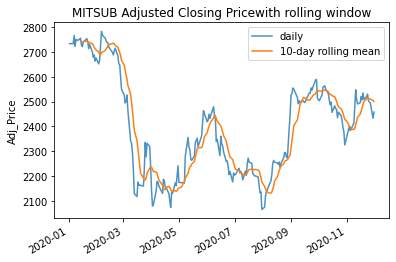

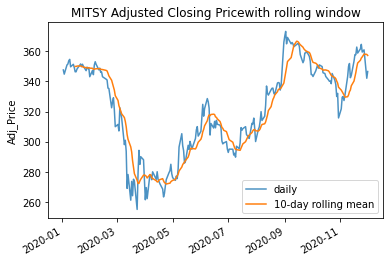

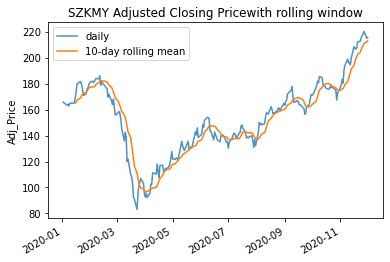

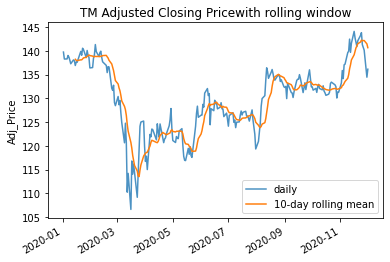

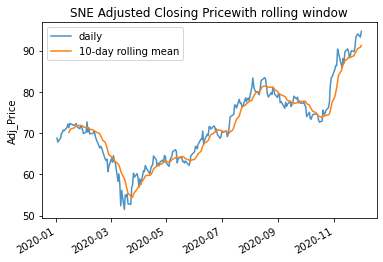

In [56]:
# plot with rolling of 10 days
plot_price_rolling(index, adj_close_imp_china, 10, name_important_stocks_china, country, 'Adjusted Closing Price', 'Adj_Price')

### Variance adjusted prices

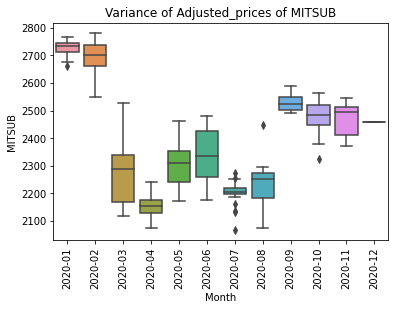

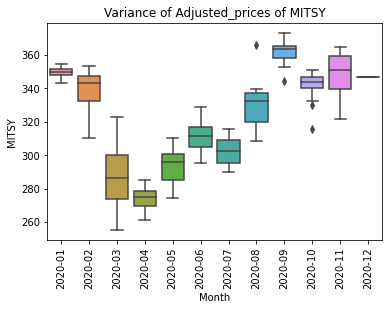

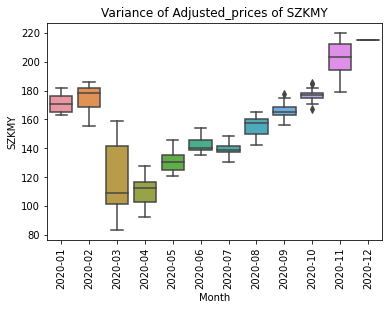

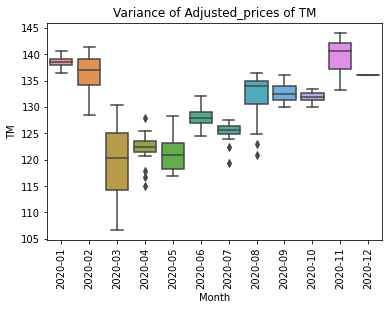

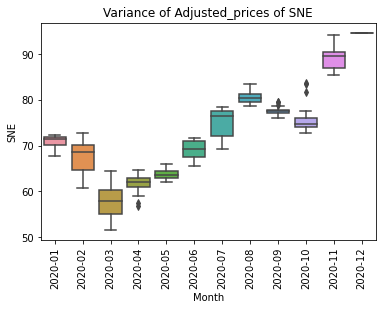

In [57]:
plot_variance(name_important_stocks_china, adj_close_imp_china, country, 'Adjusted_prices')

### Return:

$R_t = \frac{S_t-S_{t-1}}{S_{t-1}}$

In [58]:
df_returns = returns(name_important_stocks_china, adj_close_imp_china, index, country)
df_returns.head()

MITSUB     MITSY     SZKMY        TM       SNE
Date                                                        
2020-01-02       NaN       NaN       NaN       NaN       NaN
2020-01-03  0.000000 -0.796055 -0.521729 -1.047525 -1.419052
2020-01-06  0.000000  1.763106 -0.956556  0.014212  1.512923
2020-01-07  1.196250  0.174922  0.490420  0.525674  1.577196
2020-01-08 -1.559015  0.637486 -0.898203 -0.247327  0.370376

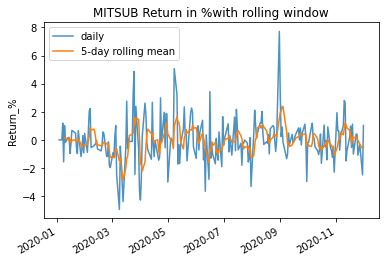

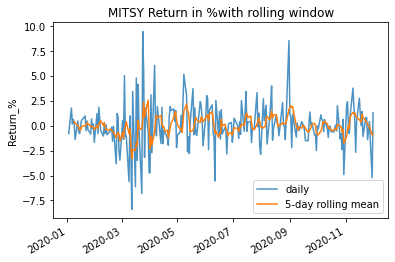

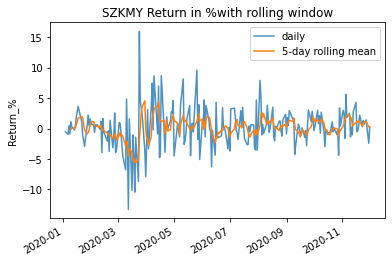

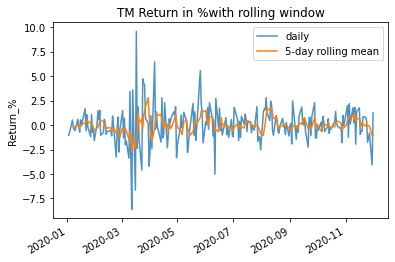

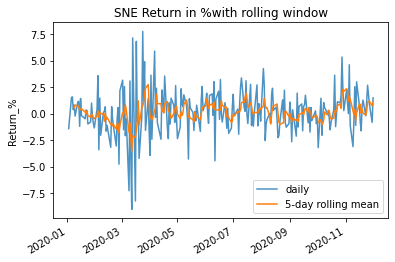

In [59]:
plot_price_rolling(index, df_returns, 5, name_important_stocks_china, country, 'Return in %', 'Return_%')

### Variance Returns

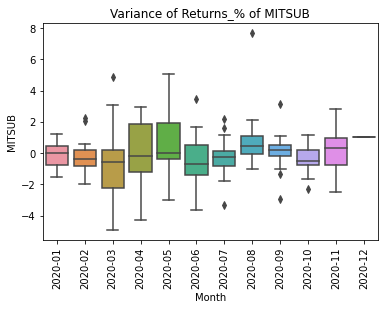

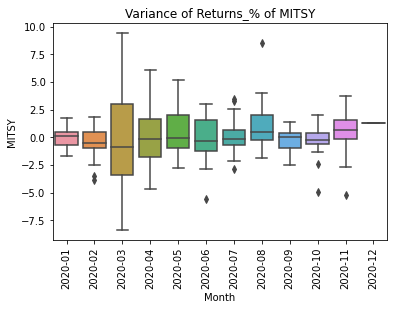

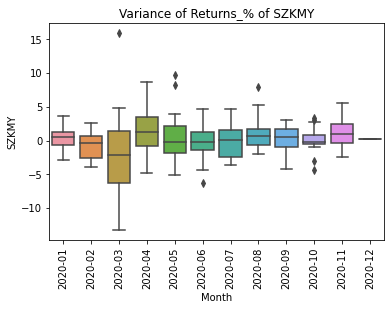

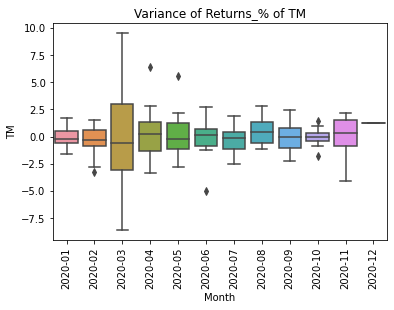

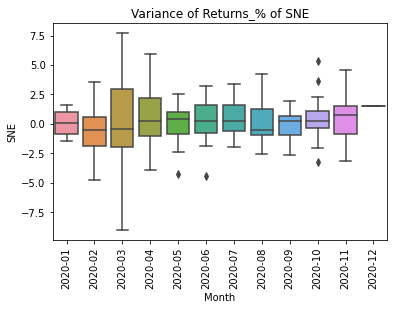

In [60]:
plot_variance(name_important_stocks_china, df_returns, country, 'Returns_%')

### Plot difference difference open closing

In order to understand how much they loose each day

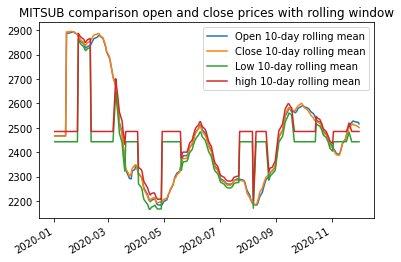

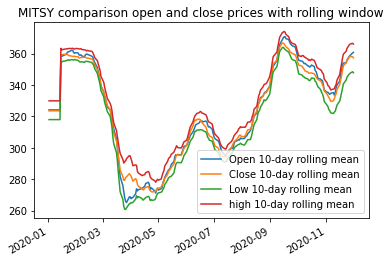

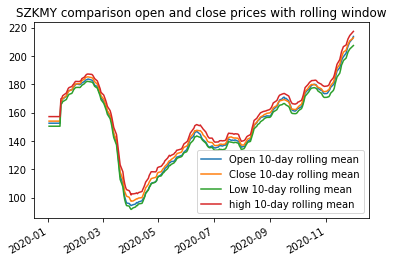

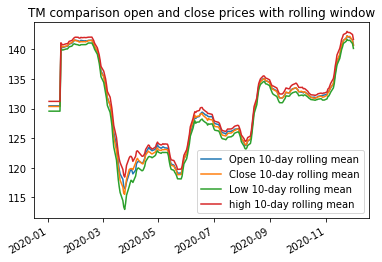

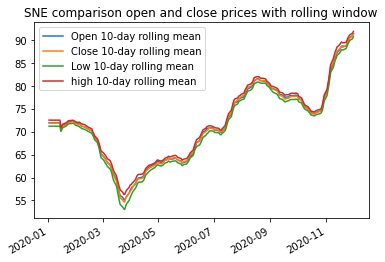

In [61]:
df = {'open': openn[country], 'close': close[country], 'high': high[country], 'low': low[country]}

plot_rolling_timeseries(index, name_important_stocks_china, df, 10, country, 'comparison open and close prices')

### Comparison SP500

In [62]:
#  create the SP500 dataframe and merge it to tnhe returns dataframe
df_returns_sp500 = create_merge_SP500_index(df_sp500_stocks, df_returns)
df_returns_sp500.head()

MITSUB     MITSY     SZKMY        TM       SNE     SP500
Date                                                                  
2020-01-07  1.196250  0.174922  0.490420  0.525674  1.577196  0.549624
2020-01-08 -1.559015  0.637486 -0.898203 -0.247327  0.370376 -0.370652
2020-01-09  1.009388  0.247871  1.108766 -0.460476  0.808970  0.251415
2020-01-10 -0.172292 -1.392886  0.325689 -0.555119 -0.239342 -0.071727
2020-01-13  0.172593  0.476424 -0.226353  0.593996  1.100767  0.347526

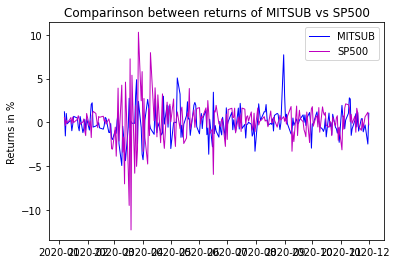

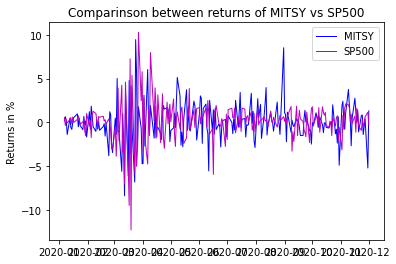

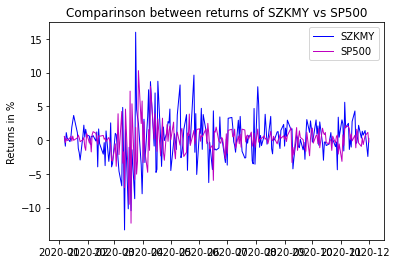

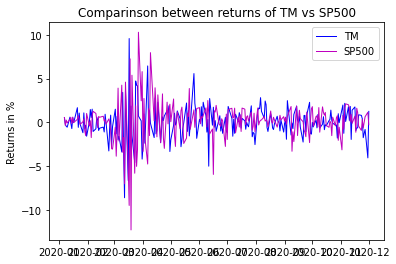

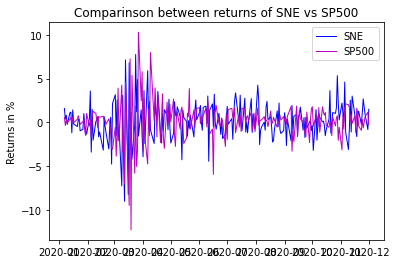

In [63]:
plot_sp500_comparison (df_returns_sp500, name_important_stocks_china, country, 'returns')

In this way it is really hard to enderstand (no good plot). Therefore, let us work with rolling windows, which lend to much more readable results

**Comparison with Rolling Windows:**

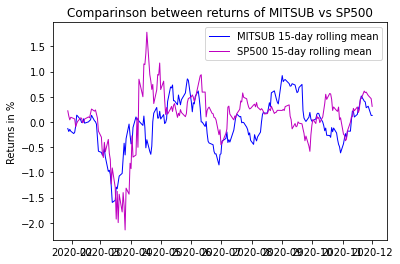

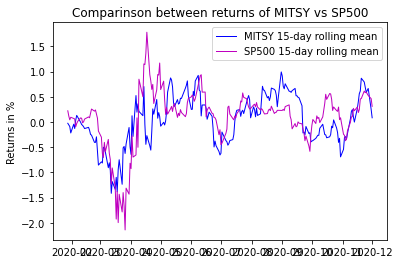

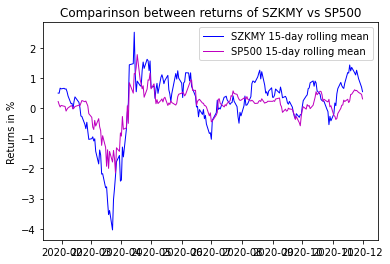

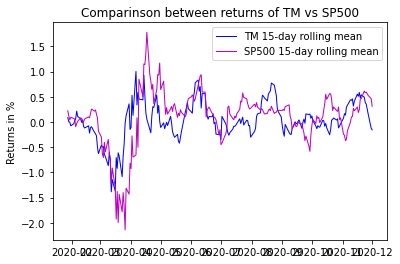

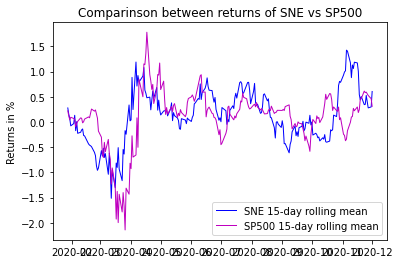

In [64]:
plot_sp500_comparison_rolling (df_returns_sp500, name_important_stocks_china, 15, country, 'returns')

# Switzerland  <a class="anchor" id="swiss"></a>

In [65]:
country = 'Switzerland'

In [66]:
index = adj_close[country]['Date'] 

### Correlation Matrix adj prices

In [67]:
print(f"Corr Matrix Adj Prices first 50 companies China")
corr = adj_close[country].corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 50 companies China


In [68]:
# name first 5
name_important_stocks_china = extract_max(adj_close[country], 5, Names=True)

# dataset first 5
adj_close_imp_china = adj_close[country][name_important_stocks_china]
adj_close_imp_china['Data'] = index
adj_close_imp_china = adj_close_imp_china.set_index('Data')
adj_close_imp_china.head()

LINDT      SGSN.SW      BARN.SW     PGHN.SW     SCMN.SW
Data                                                                      
2020-01-02  86079.242188  2568.275879  2093.832520  866.239929  494.463837
2020-01-03  86079.242188  2568.275879  2093.832520  866.239929  494.463837
2020-01-06  85484.218750  2551.862061  2123.518066  865.854065  496.767181
2020-01-07  85682.562500  2548.000000  2139.350586  871.834778  497.726929
2020-01-08  85880.898438  2543.172363  2109.664795  884.953857  497.918915

In [69]:
# first 5 companies
print(f"Corr Matrix Adj Prices first 5 companies China")
corr = adj_close_imp_china.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 5 companies China


### Plot time series adjusted closing price

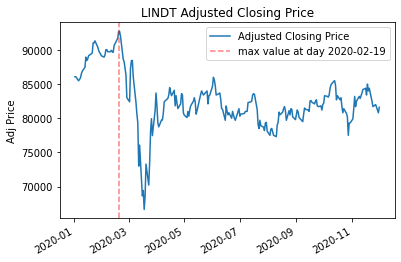

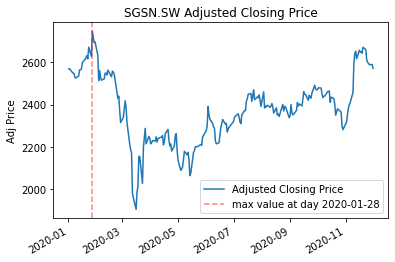

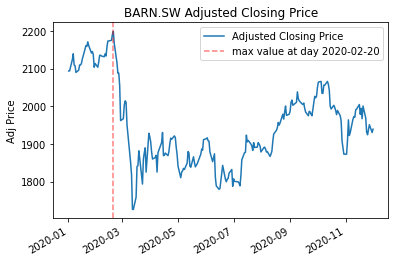

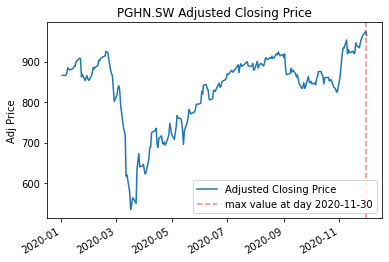

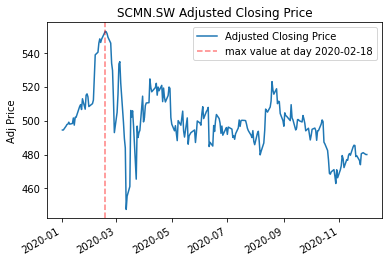

In [70]:
plot_price(index, adj_close_imp_china, name_important_stocks_china, country, 'Adjusted Closing Price', 'Adj Price')

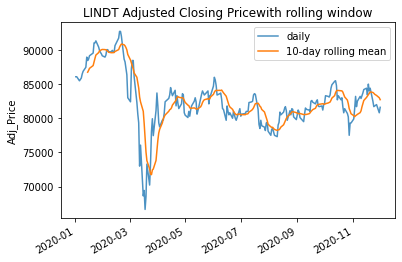

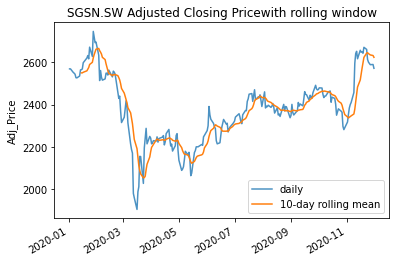

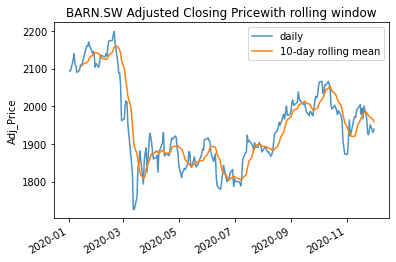

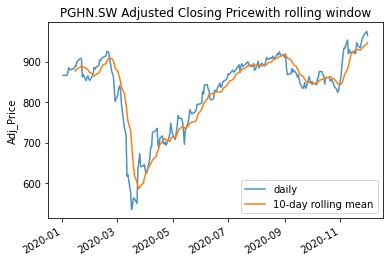

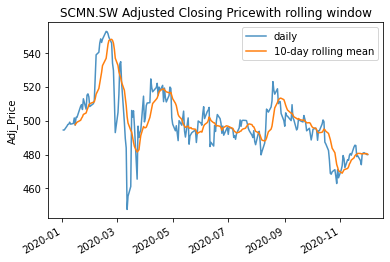

In [71]:
# plot with rolling of 10 days
plot_price_rolling(index, adj_close_imp_china, 10, name_important_stocks_china, country, 'Adjusted Closing Price', 'Adj_Price')

### Variance adjusted prices

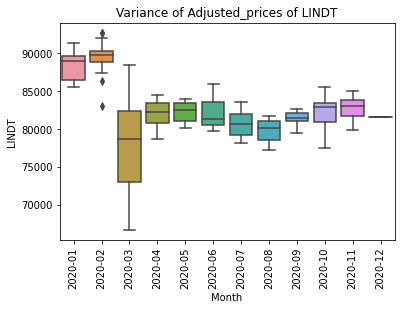

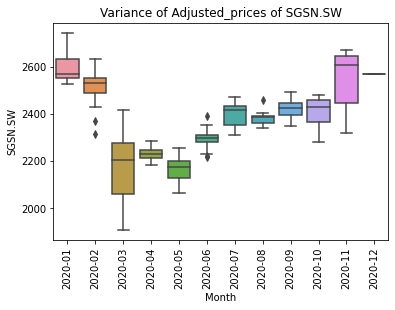

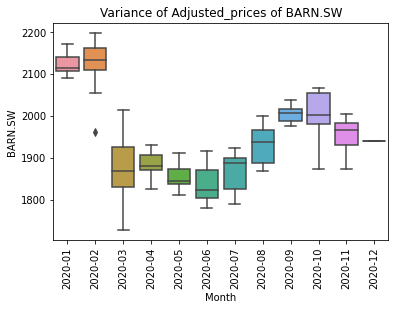

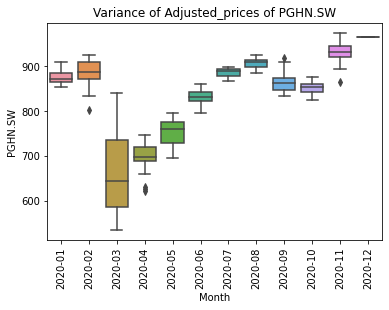

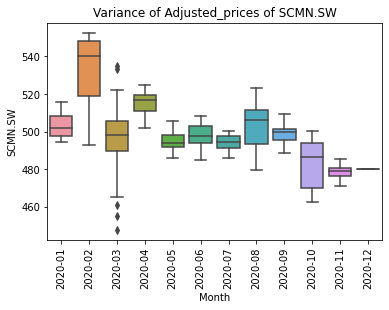

In [72]:
plot_variance(name_important_stocks_china, adj_close_imp_china, country, 'Adjusted_prices')

### Return:

$R_t = \frac{S_t-S_{t-1}}{S_{t-1}}$

In [73]:
df_returns = returns(name_important_stocks_china, adj_close_imp_china, index, country)
df_returns.head()

LINDT   SGSN.SW   BARN.SW   PGHN.SW   SCMN.SW
Date                                                        
2020-01-02       NaN       NaN       NaN       NaN       NaN
2020-01-03  0.000000  0.000000  0.000000  0.000000  0.000000
2020-01-06 -0.691251 -0.639099  1.417761 -0.044545  0.465827
2020-01-07  0.232024 -0.151343  0.745580  0.690730  0.193199
2020-01-08  0.231478 -0.189468 -1.387608  1.504767  0.038573

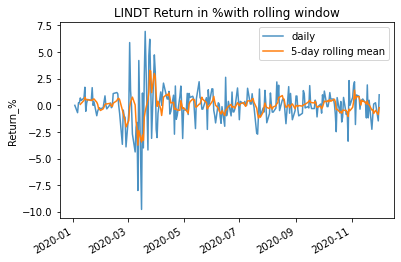

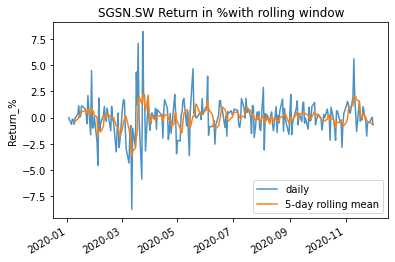

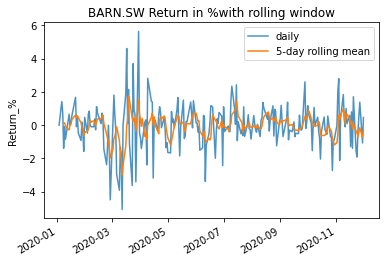

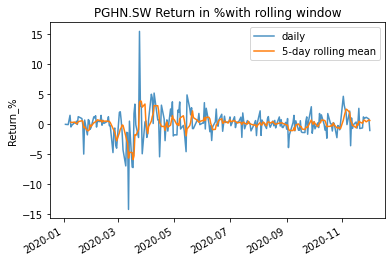

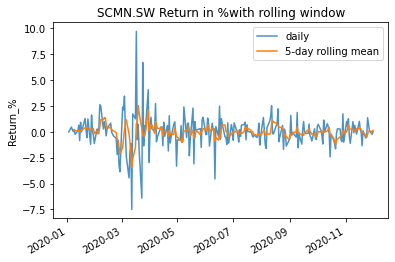

In [74]:
plot_price_rolling(index, df_returns, 5, name_important_stocks_china, country, 'Return in %', 'Return_%')

### Variance Returns

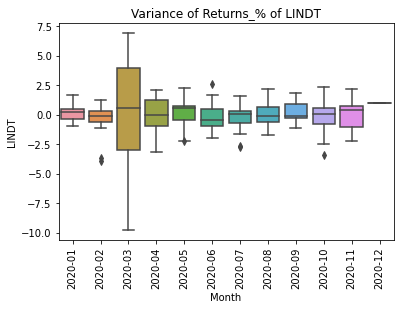

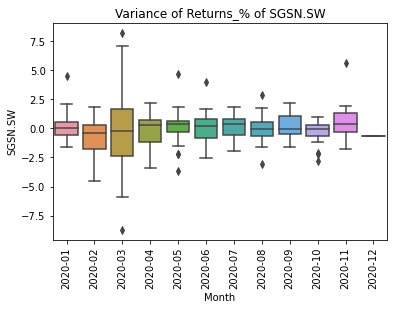

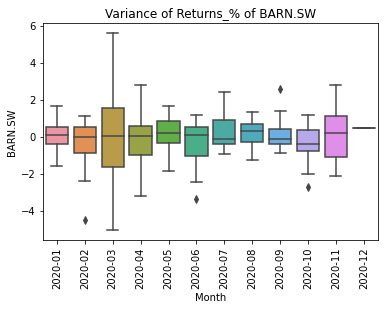

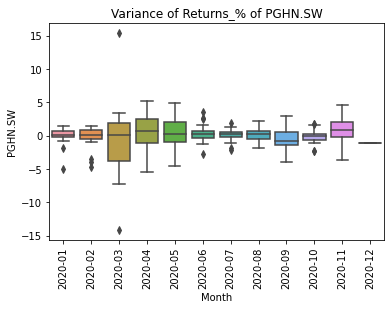

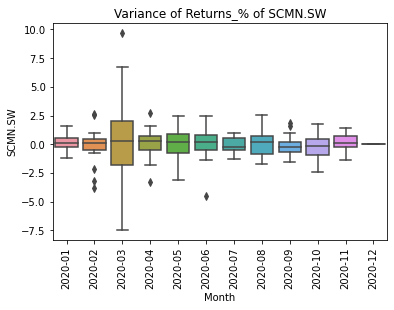

In [75]:
plot_variance(name_important_stocks_china, df_returns, country, 'Returns_%')

### Plot difference difference open closing

In order to understand how much they loose each day

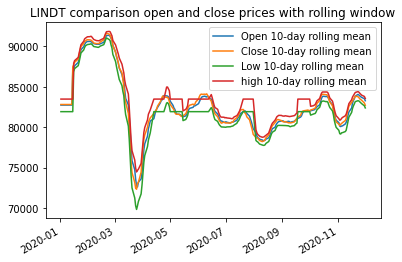

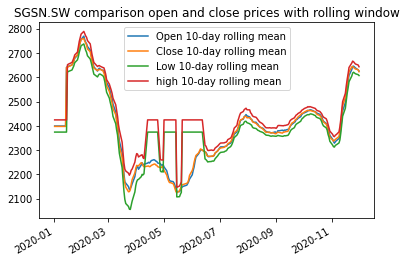

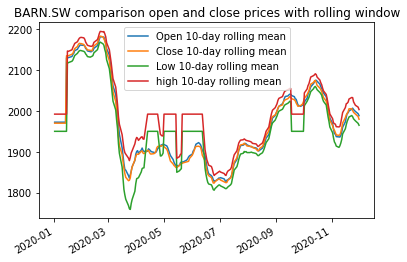

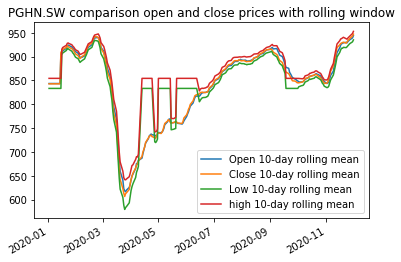

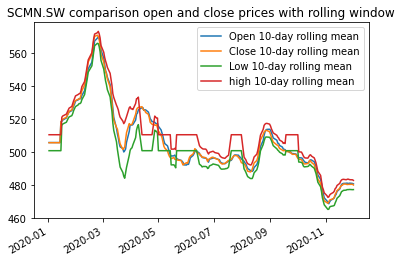

In [76]:
df = {'open': openn[country], 'close': close[country], 'high': high[country], 'low': low[country]}

plot_rolling_timeseries(index, name_important_stocks_china, df, 10, country, 'comparison open and close prices')

### Comparison SP500

In [77]:
#  create the SP500 dataframe and merge it to tnhe returns dataframe
df_returns_sp500 = create_merge_SP500_index(df_sp500_stocks, df_returns)
df_returns_sp500.head()

LINDT   SGSN.SW   BARN.SW   PGHN.SW   SCMN.SW     SP500
Date                                                                  
2020-01-07  0.232024 -0.151343  0.745580  0.690730  0.193199  0.549624
2020-01-08  0.231478 -0.189468 -1.387608  1.504767  0.038573 -0.370652
2020-01-09  0.692838 -0.645407 -0.093807 -0.436021  0.231303  0.251415
2020-01-10  0.458717 -0.038214 -0.845075 -0.153271 -0.230770 -0.071727
2020-01-13  0.684938  0.344038  0.284096  0.285082  0.077103  0.347526

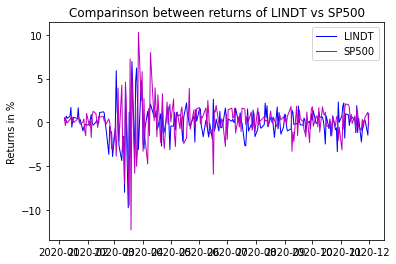

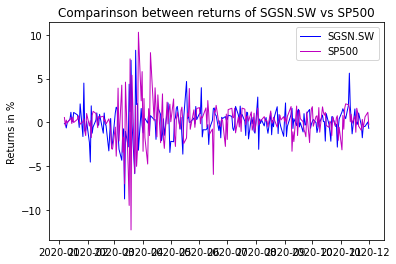

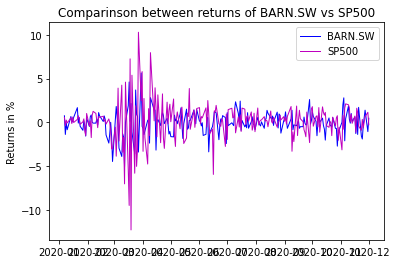

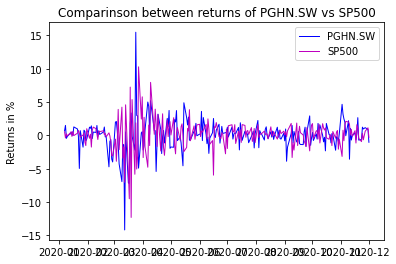

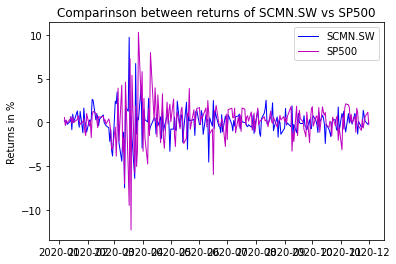

In [78]:
plot_sp500_comparison (df_returns_sp500, name_important_stocks_china, country, 'returns')

In this way it is really hard to enderstand (no good plot). Therefore, let us work with rolling windows, which lend to much more readable results

**Comparison with Rolling Windows:**

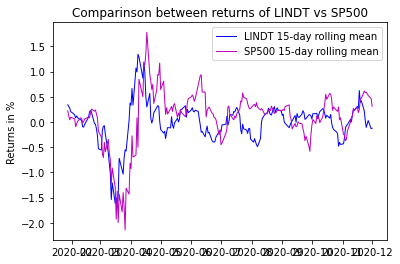

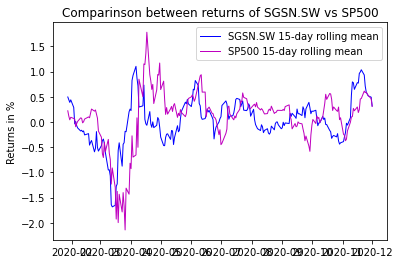

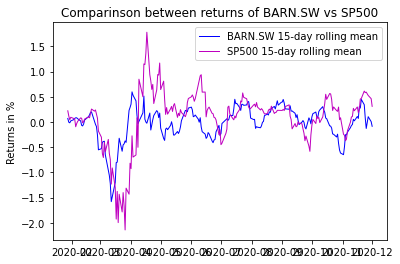

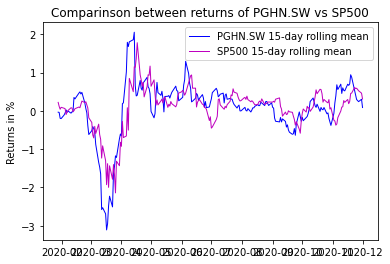

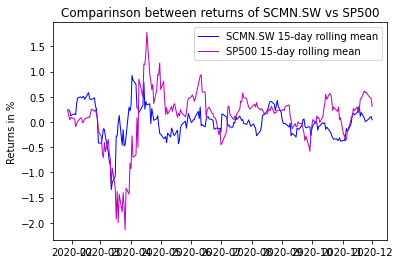

In [79]:
plot_sp500_comparison_rolling (df_returns_sp500, name_important_stocks_china, 15, country, 'returns')

## Create portfolios with adjusted closed price
### EW

In [84]:
df_portfolio = pd.DataFrame(index=df_returns.index[1:])

In [90]:
adj_close = adj_close["China"].set_index('Date') # try out with China
returns_all = (adj_close - adj_close.shift(1))/adj_close.shift(1) # return calculated as fraction/decimal
returns_all = returns_all.iloc[1:] # ignore first row
returns_all.head(10)

TCEHY      BABA    MOUTAI   1398.HK     PNGAY       PDD  \
Date                                                                     
2020-01-03 -0.017041 -0.012604 -0.045522 -0.008264 -0.003702 -0.008246   
2020-01-06 -0.005303 -0.001659 -0.000529 -0.011667  0.002890 -0.019565   
2020-01-07  0.020709  0.004570  0.015343 -0.003373 -0.004529  0.027937   
2020-01-08 -0.002611  0.001700 -0.005838 -0.011844 -0.003309 -0.017229   
2020-01-09  0.016717  0.017339  0.013380  0.017123  0.005809 -0.020741   
2020-01-10  0.018819  0.009243  0.008887 -0.001684 -0.003713 -0.031266   
2020-01-13  0.017111  0.029710  0.010580  0.006745  0.031470  0.024206   
2020-01-14 -0.017588 -0.017312 -0.015005 -0.010050  0.004416 -0.033799   
2020-01-15 -0.004281 -0.006314  0.004271 -0.001692 -0.012790  0.017096   
2020-01-16  0.007426 -0.004976 -0.004613 -0.008475  0.007692  0.021722   

               CICHY   3968.HK     ACGBY        JD  ...     WXXWY  600309.SS  \
Date                                                ...                        
2020-01-03 -0.023282  0.001212 -0.011607  0.006891  ...  0.002045   0.018787   
2020-01-06 -0.004651 -0.009685 -0.008130  0.000263  ... -0.035922  -0.030558   
2020-01-07 -0.011682 -0.001223 -0.008197  0.008421  ...  0.039936  -0.007609   
2020-01-08  0.002364 -0.023256 -0.003673 -0.000522  ... -0.001536  -0.009675   
2020-01-09  0.010024  0.015038 -0.007373  0.015666  ... -0.025961   0.020461   
2020-01-10  0.009924 -0.003704  0.011142  0.005398  ... -0.008096  -0.018064   
2020-01-13  0.018497  0.018587  0.004591  0.030683  ...  0.013137   0.000736   
2020-01-14 -0.012486 -0.003650 -0.013711 -0.000496  ...  0.001179   0.012316   
2020-01-15 -0.005747 -0.007326  0.010195 -0.012658  ...  0.003140  -0.020156   
2020-01-16 -0.005780  0.002460 -0.011009 -0.005530  ...  0.063615   0.002780   

             2202.HK  601633.SS  300015.SZ  600887.SS     BKFCF     AS7.F  \
Date                                                                        
2020-01-03 -0.029112  -0.003261  -0.002785  -0.000315  0.000000 -0.012439   
2020-01-06 -0.013493  -0.022901  -0.021579  -0.020479  0.000000 -0.009632   
2020-01-07  0.006079   0.021205   0.016866   0.034095  0.000000  0.068578   
2020-01-08 -0.006042  -0.018579  -0.009696   0.001244  0.000000 -0.026838   
2020-01-09  0.019757   0.013363   0.067766   0.009320  0.042857  0.079137   
2020-01-10 -0.031297   0.003297   0.007722  -0.002155  0.000000  0.000000   
2020-01-13  0.009231  -0.005476  -0.005508   0.017582  0.000000 -0.023333   
2020-01-14 -0.009146  -0.015419  -0.007464  -0.007881  0.000000  0.005233   
2020-01-15 -0.010769  -0.015660  -0.003396   0.016499  0.000000  0.018334   
2020-01-16  0.000000  -0.013636   0.038461   0.007815  0.000000  0.000222   

             6862.HK  300059.SZ  
Date                             
2020-01-03  0.023184   0.006289  
2020-01-06 -0.022659   0.009375  
2020-01-07  0.035549  -0.000619  
2020-01-08  0.013433  -0.037175  
2020-01-09  0.002945   0.030244  
2020-01-10  0.036711   0.006246  
2020-01-13  0.005666   0.004966  
2020-01-14  0.005634  -0.019765  
2020-01-15 -0.012605  -0.007561  
2020-01-16 -0.005674  -0.003175  

[10 rows x 48 columns]

In [91]:
df_portfolio['EW'] = returns_all.mean(axis=1).values
df_portfolio.head()

EW
Date                
2020-01-03 -0.005673
2020-01-06 -0.008823
2020-01-07  0.007726
2020-01-08 -0.005199
2020-01-09  0.018197

### VW
The first 5 have 60% of the value and all the others 40%

In [ ]:
# names two groups
stocks_60_names =  highest_name
stocks_40_names = [ stock for stock in returns_all.columns if stock not in  highest_name]  

# stocks value two groups
stocks_60 = returns_all[stocks_60_names]
stocks_40 = returns_all[stocks_40_names]

# mean each group
stocks_60_mean = stocks_60.mean(axis=1).values
stocks_40_mean = stocks_40.mean(axis=1).values

# weight 60 40:
df_portfolio['VW'] = stocks_60_mean * 0.6 + stocks_40_mean * 0.4

Of course the VW portfolio has higher values

In [ ]:
df_portfolio.head()

In [ ]:
# save:
df_portfolio.to_csv('datasets_stocks/japan_portfolio.csv')

In [88]:
adj_close["China"]

TCEHY        BABA       MOUTAI   1398.HK      PNGAY         PDD  \
0    49.746311  219.770004  1116.952637  5.714292  23.601267   41.230000   
1    48.898586  217.000000  1066.106689  5.667066  23.513891   40.889999   
2    48.639286  216.639999  1065.543213  5.600950  23.581852   40.090000   
3    49.646576  217.630005  1081.892212  5.582060  23.475058   41.209999   
4    49.516926  218.000000  1075.576050  5.515944  23.397388   40.500000   
..         ...         ...          ...       ...        ...         ...   
227  75.790001  279.959991  1763.500000  4.530000  22.809999  143.940002   
228  74.750000  277.720001  1726.880005  4.580000  23.219999  135.899994   
229  75.949997  276.480011  1737.900024  4.870000  23.799999  144.050003   
230  73.000000  263.359985  1713.910034  4.920000  23.559999  138.809998   
231  74.599998  264.010010  1737.000000  5.100000  24.430000  136.539993   

         CICHY    3968.HK      ACGBY         JD  ...  600309.SS    2202.HK  \
0    16.609886  39.731014  10.476221  37.730000  ...  54.310841  32.926811   
1    16.223171  39.779175  10.354622  37.990002  ...  55.331173  31.968245   
2    16.147715  39.393906  10.270438  38.000000  ...  53.640339  31.536892   
3    15.959072  39.345745  10.186255  38.320000  ...  53.232204  31.728603   
4    15.996799  38.430729  10.148840  38.299999  ...  52.717178  31.536892   
..         ...        ...        ...        ...  ...        ...        ...   
227  15.120000  49.299999   9.020000  89.820000  ...  87.250000  28.549999   
228  15.080000  49.250000   9.230000  88.230003  ...  84.180000  28.700001   
229  15.790000  51.299999   9.580000  89.410004  ...  83.879997  29.700001   
230  15.610000  49.049999   9.420000  85.349998  ...  81.199997  29.450001   
231  15.960000  50.049999   9.700000  85.360001  ...  84.000000  28.549999   

     601633.SS  300015.SZ  600887.SS    BKFCF      AS7.F    6862.HK  \
0     8.909595  39.379791  30.908182  0.64569   7.636105  32.220428   
1     8.880543  39.270126  30.898447  0.64569   7.541120  32.967422   
2     8.677172  38.422714  30.265682  0.64569   7.468484  32.220428   
3     8.861174  39.070736  31.297579  0.64569   7.980661  33.365822   
4     8.696540  38.691895  31.336515  0.64569   7.766478  33.814022   
..         ...        ...        ...      ...        ...        ...   
227  26.450001  63.630001  38.700001  0.50000  12.000000  54.849998   
228  27.750000  62.060001  37.790001  0.50000  11.265000  52.000000   
229  27.309999  62.619999  38.299999  0.50000  11.735000  51.799999   
230  27.889999  61.200001  37.790001  0.50000  11.430000  50.849998   
231  27.950001  65.279999  38.549999  0.50000  11.735000  51.500000   

     300059.SZ        Date  
0    15.873410  2020-01-02  
1    15.973244  2020-01-03  
2    16.122992  2020-01-06  
3    16.113008  2020-01-07  
4    15.514013  2020-01-08  
..         ...         ...  
227  26.110001  2020-11-24  
228  25.670000  2020-11-25  
229  26.690001  2020-11-27  
230  27.500000  2020-11-30  
231  29.420000  2020-12-01  

[232 rows x 49 columns]

In [89]:
adj_close

{'China':          TCEHY        BABA       MOUTAI   1398.HK      PNGAY         PDD  \
 0    49.746311  219.770004  1116.952637  5.714292  23.601267   41.230000   
 1    48.898586  217.000000  1066.106689  5.667066  23.513891   40.889999   
 2    48.639286  216.639999  1065.543213  5.600950  23.581852   40.090000   
 3    49.646576  217.630005  1081.892212  5.582060  23.475058   41.209999   
 4    49.516926  218.000000  1075.576050  5.515944  23.397388   40.500000   
 ..         ...         ...          ...       ...        ...         ...   
 227  75.790001  279.959991  1763.500000  4.530000  22.809999  143.940002   
 228  74.750000  277.720001  1726.880005  4.580000  23.219999  135.899994   
 229  75.949997  276.480011  1737.900024  4.870000  23.799999  144.050003   
 230  73.000000  263.359985  1713.910034  4.920000  23.559999  138.809998   
 231  74.599998  264.010010  1737.000000  5.100000  24.430000  136.539993   
 
          CICHY    3968.HK      ACGBY         JD  ...  600309.SS 

In [ ]:
adj_close[""]